In [166]:
# Import the machine learning libraries.
import nltk
import urllib
import bs4 as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [167]:
# Install sensim.
pip install gensim

In [0]:
# Get the data source from the Wikipedia.
source = urllib.request.urlopen('https://en.wikipedia.org/wiki/Brain%E2%80%93computer_interface').read()

In [0]:
# Parse the data and create BeautifulSoup object.
soup = bs.BeautifulSoup(source,'lxml')

In [0]:
# Fetch the data.
text = ""
for paragraph in soup.find_all('p'):
    text += paragraph.text

In [0]:
# Preprocess the data.
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\W',' ',text)
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

<function matplotlib.pyplot.show>

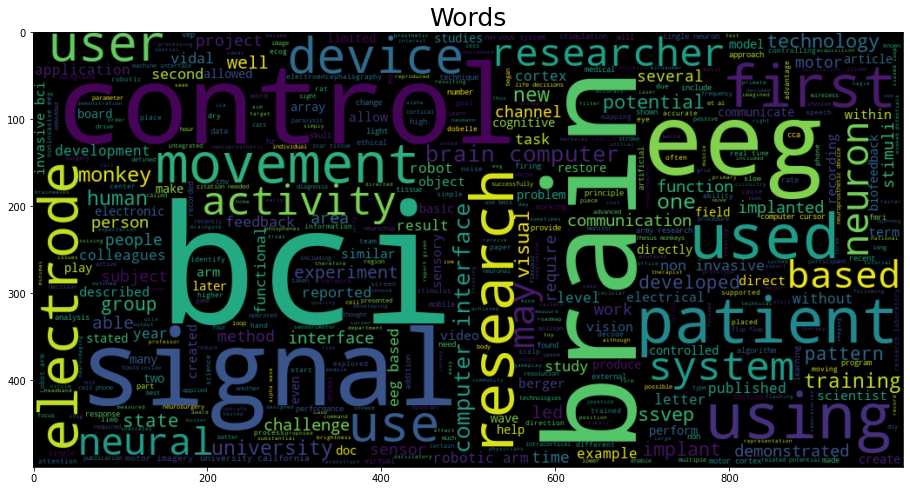

In [172]:
# Word cloud for the cleaned text.
plt.figure(figsize=(16,8))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)
wc_clean_text = WC.generate(text)
plt.imshow(wc_clean_text, interpolation='bilinear')
plt.title('Words', fontsize=25)
plt.show

In [0]:
# Tokenize sentences.
sentences = nltk.sent_tokenize(text)

In [0]:
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

In [0]:
for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]

In [0]:
# Train the Word2Vec model.
model = Word2Vec(sentences, min_count=1)

In [0]:
words = model.wv.vocab

In [0]:
# Find Word Vectors
vector = model.wv['brain']

In [180]:
print(vector)

[-1.4828872e-03  2.7926133e-03 -8.7113847e-04  2.5725688e-03
  1.4741304e-03 -2.2990224e-03 -3.7801987e-04 -2.3362555e-03
 -3.4735654e-03  4.7448117e-05  1.5160183e-03  3.9230180e-03
 -4.7777151e-03  1.1966724e-03  1.8669568e-03  4.1916119e-03
 -1.8471889e-03 -2.4597445e-03 -2.2990429e-03 -2.7860256e-03
  5.6331884e-03  5.6215335e-04  2.0540142e-03 -5.3141644e-04
  3.4838819e-03  3.6896132e-03 -4.7546127e-03  1.6655690e-03
  1.7338110e-03 -1.6551296e-03  2.0660539e-03 -3.6265319e-03
  3.7769538e-03 -2.6611483e-03  6.0485787e-04 -7.2892196e-04
 -1.1705665e-03  4.7313166e-04 -2.1647778e-03  5.6801727e-03
  2.7118903e-03  4.3213600e-04  3.1875363e-03  3.3629849e-03
 -4.4073062e-03 -1.1584057e-03  5.7849498e-04  3.3735486e-03
 -3.2831432e-04  2.6880470e-03 -3.3868372e-03  3.2428603e-03
 -3.7496074e-03 -3.0117671e-03  4.1495860e-03 -2.2012091e-03
 -2.3464898e-03 -4.9285903e-03  6.6443360e-03 -3.7900554e-03
 -2.0181118e-03  3.4297192e-03 -1.9537292e-03  4.2316737e-03
  2.3042322e-03 -1.44238

In [195]:
# Most similar words
similar = model.wv.most_similar('neural')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [196]:
similar

[('brain', 0.3410419225692749),
 ('reading', 0.34028762578964233),
 ('one', 0.3103599548339844),
 ('nine', 0.28994321823120117),
 ('referred', 0.28251612186431885),
 ('application', 0.28111088275909424),
 ('inserted', 0.28003087639808655),
 ('binary', 0.27925199270248413),
 ('written', 0.2724419832229614),
 ('nci', 0.2680032253265381)]

In [183]:
# Most similar words
similar = model.wv.most_similar('movement')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [184]:
similar

[('utilizing', 0.35354217886924744),
 ('apostolos', 0.33169037103652954),
 ('minimal', 0.32995572686195374),
 ('electrode', 0.3284573256969452),
 ('cover', 0.32156914472579956),
 ('patient', 0.3174038529396057),
 ('part', 0.3144603371620178),
 ('wider', 0.30720171332359314),
 ('medicine', 0.3047213852405548),
 ('single', 0.2991204261779785)]

In [185]:
# Most similar words
similar = model.wv.most_similar('signal')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [186]:
similar

[('instead', 0.3399377465248108),
 ('process', 0.32207560539245605),
 ('hours', 0.3197896480560303),
 ('new', 0.3095429539680481),
 ('hz', 0.30871284008026123),
 ('functionality', 0.2976785898208618),
 ('cursors', 0.2973334491252899),
 ('mobile', 0.29581886529922485),
 ('fmri', 0.2921963930130005),
 ('models', 0.2801961898803711)]

In [187]:
# Most similar words
similar = model.wv.most_similar('brain')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [188]:
similar

[('sleep', 0.41603341698646545),
 ('veps', 0.3866592049598694),
 ('channel', 0.36697983741760254),
 ('response', 0.3460291028022766),
 ('neural', 0.3410419225692749),
 ('visual', 0.33833616971969604),
 ('referred', 0.326285719871521),
 ('led', 0.3212068974971771),
 ('new', 0.315733402967453),
 ('nci', 0.3061356842517853)]